In [168]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [203]:
telemetry = np.array([[0.01, 2, 7, 1],
                      [0.11, 1.99, 6.9, 1]])

In [204]:
def velocity(telemetry):
    velo_data = (telemetry[-1] - telemetry[-2])/(telemetry[-1,0] - telemetry[-2,0])
    return (telemetry[-1], velo_data)

In [205]:
velocity(telemetry=telemetry)

(array([ 0.11,  1.99,  6.9 ,  1.  ]), array([ 1. , -0.1, -1. ,  0. ]))

In [209]:
projected_path = telemetry

In [210]:
def extrapolate_projection(telemetry):
    velo_data = velocity(telemetry=telemetry)

In [211]:
time = np.arange(start_time,2,.1)

In [217]:
frame = pd.DataFrame(projected_path, columns=['time','x_pos','y_pos','z_pos'])

In [218]:
velo_data = velocity(telemetry=telemetry)

In [234]:
for x in range(2,10):
    frame.ix[x] = frame.ix[x-1]+(velo_data[1]*(time[x-1]-time[x-2]))
    frame.loc[x,'y_pos'] = frame.loc[x,'y_pos']+(velo_data[1][2]*(time[x]))+(.5*(-9.8)*(time[x]**2))
#     frame.loc[x,'y_pos'] = frame.loc[x,'y_pos']+(velo_data[1][2]*(time[x-1]-time[x-2]))+(.5*(-9.8)*time[x])**2

In [235]:
frame

,time,x_pos,y_pos,z_pos
0,0.01,2.00,7.00000,1.0
1,0.11,1.99,6.90000,1.0
2,0.21,1.98,6.01911,1.0
3,0.31,1.97,4.68542,1.0
4,0.41,1.96,2.80093,1.0
5,0.51,1.95,0.26764,1.0
6,0.61,1.94,-3.01245,1.0
7,0.71,1.93,-7.13734,1.0
8,0.81,1.92,-12.20503,1.0
9,0.91,1.91,-18.31352,1.0


In [242]:
time = np.arange(0,1.01,.05)

b = []
for x in time:
    b.append(.5*(-9.8)*x**2)

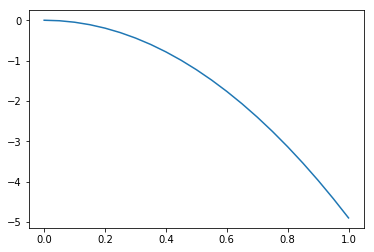

In [244]:
plt.figure()
plt.plot(time,b)

(0, 2)

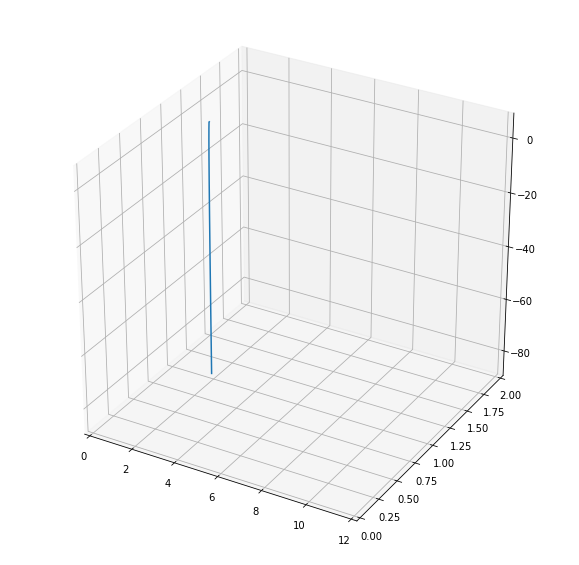

In [215]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# ax.plot(frame['x_pos'],frame['y_pos'])
ax.plot(xs=frame['x_pos'], zs=frame['y_pos'], ys=frame['z_pos'])
ax.mouse_init()
ax.set_xlim(0,12)
ax.set_ylim(0,2)

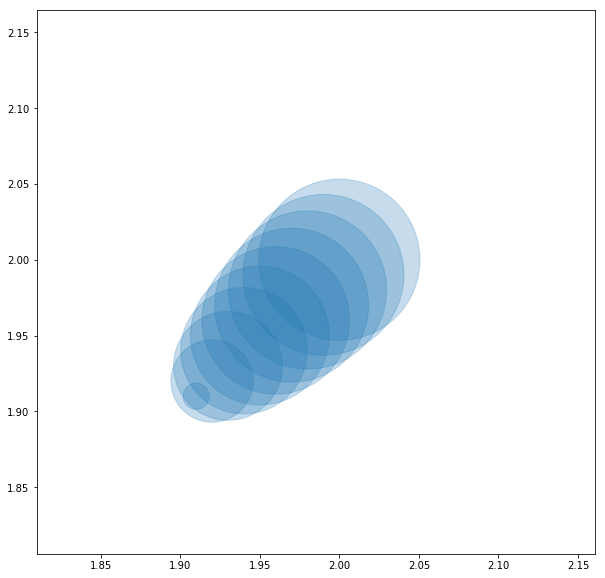

In [257]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(frame['x_pos'], frame['x_pos'] ,s=(frame['y_pos']+19)*1000, alpha=.25)

In [253]:
frame

,time,x_pos,y_pos,z_pos
0,0.01,2.00,7.00000,1.0
1,0.11,1.99,6.90000,1.0
2,0.21,1.98,6.01911,1.0
3,0.31,1.97,4.68542,1.0
4,0.41,1.96,2.80093,1.0
5,0.51,1.95,0.26764,1.0
6,0.61,1.94,-3.01245,1.0
7,0.71,1.93,-7.13734,1.0
8,0.81,1.92,-12.20503,1.0
9,0.91,1.91,-18.31352,1.0
